### LDA(Linear Discriminant Analysis)

#### LDA 개요

- **LDA**는 선형 판별 분석법으로 불리며 PCA와 매우 유사하다

- PCA와 유사하게 입력 데이터셋을 저차원 공간에 투영해 차원을 축소하는 기법이지만, LDA는 '지도학습의 분류'에서 사용하기 쉽도록 **개별 클래스를 분별할 수 있는 기준을 최대한 유지**하면서 차원을 축소한다

- LDA는 **입력 데이터의 타겟값 클래스를 최대한으로 분리할 수 있는 축**을 찾는다

  - 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해, 클래스 간 분산(between-class scatter)과 클래스 내부 분산(within-class scatter)의 비율을 최대화하는 방식

  - 즉, 클래스 간 분산은 최대한 크게, 클래스 내부 분산은 최대한 작게 가져가는 방식

- LDA는 클래스 간 분산과 클래스 내부 분산 행렬을 생성한 뒤, 이 행렬에 기반해 고유벡터를 구하고 입력 데이터를 투영한다

#### iris 데이터에 LDA 적용하기

- discriminant_analysis의 LinearDiscriminantAnalysis 클래스

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

lDA에서 한 가지 유의해야 할 점은 PCA와 다르게 비지도학습이 아니라 **지도학습**이라는 것

lda 객체의 fit을 호출할 때 결정값이 입력되어야 한다

In [2]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


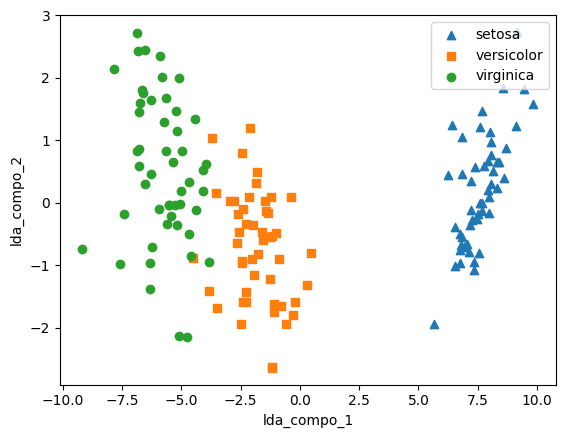

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

lda_cols = ['lda_compo_1', 'lda_compo_2']
iris_df_lda = pd.DataFrame(iris_lda, columns=lda_cols)
iris_df_lda['target'] = iris.target

markers=['^', 's', 'o']

#setosa의 target값은 0, versicolor은 1, virginica는 2
for i, marker in enumerate(markers):
  x_axis_data = iris_df_lda[iris_df_lda['target']==i]['lda_compo_1']
  y_axis_data = iris_df_lda[iris_df_lda['target']==i]['lda_compo_2']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_compo_1')
plt.ylabel('lda_compo_2')
plt.show()

산점도를 비교해보면 PCA로 변환된 데이터와 좌우 대칭 형태로 닮아있다